# 🤝 Interactions

Before you start:
- Make sure you have the following packages installed via `pip`:
    - `energyplus-ooep`
    - `energyplus-dataset`

What you will learn in this chapter:
- How to _control_ simulator lifecycles.
- How to _access_ simulator variables and events.
- How to _visualize_ simulator variables.

TODO

In [1]:
def _hotfix10447_monkey():
    import energyplus.core
    DataExchange = energyplus.core.pyenergyplus.datatransfer.DataExchange

    if getattr(DataExchange, '_hotfix10447', False):
        return
    
    _get_api_data = DataExchange.get_api_data
    def _hotfix10447_get_api_data(self, state):
        return [
            DataExchange.APIDataExchangePoint(
                _what=datapoint.what,
                _name=datapoint.name, 
                _key=datapoint.type, 
                _type=datapoint.key,
            )
            for datapoint in (
                _get_api_data(self, state)
            )
        ]
    DataExchange.get_api_data = _hotfix10447_get_api_data
    setattr(DataExchange, '_hotfix10447', True)

_hotfix10447_monkey()

## 🧳 Prepare

In [2]:
import energyplus.ooep as _ooep_
from energyplus.ooep.addons.progress import ProgressProvider
from energyplus.ooep.addons.logging import LogProvider
from energyplus.dataset.basic import dataset as _epds_

## 💨 Run!

In [3]:
simulator = _ooep_.Simulator().add(ProgressProvider(), LogProvider())

_ = simulator.awaitable.run(
    input=_ooep_.Simulator.InputSpecs(
        model=(
            _epds_.models / 'ASHRAE901_OfficeLarge_STD2019_Denver_Chiller205_Detailed.idf'
        ),
        weather=(_epds_.weathers / 'USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw'),
    )
)

  0%|          | 0/100 [00:00<?, ?it/s]

🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc16ad3250>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc16bdcc90>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc16ac2410>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc16aa7010>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc18686450>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc169d4550>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc0e705b50>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc169923d0>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc16c63010>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc0e51c910>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc169c3150>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc0e51d990>
🥳 <energyplus.ooep.components.events.MessageEvent object at 0x7efc0e51ce50>


## 👀 Observe

TODO introduce manager pattern; references

### 🔣 Variables

In [4]:
list(simulator.variables.keys())

[WallClock.Ref()]

### 🔔 Events

In [10]:
list(simulator.events.keys())

dict_keys(['message', 'progress', 'after_component_get_input', 'after_new_environment_warmup_complete', 'after_predictor_after_hvac_managers', 'after_predictor_before_hvac_managers', 'begin_new_environment', 'begin_system_timestep_before_predictor', 'begin_zone_timestep_after_init_heat_balance', 'begin_zone_timestep_before_init_heat_balance', 'begin_zone_timestep_before_set_current_weather', 'end_system_sizing', 'end_system_timestep_after_hvac_reporting', 'end_system_timestep_before_hvac_reporting', 'end_zone_sizing', 'end_zone_timestep_after_zone_reporting', 'end_zone_timestep_before_zone_reporting', 'inside_system_iteration_loop', 'register_external_hvac_manager', 'unitary_system_sizing'])

Get [in the "loop"](https://wiktionary.org/wiki/in_the_loop), [literally](https://wikipedia.org/wiki/Event_loop).

In [11]:
simulator.events.on('message', lambda event: print('🥳', event))

### 💲 Data

TODO

In [13]:
try:
    simulator.variables.getdefault(
        _ooep_.OutputVariable.Ref(
            type='Site Outdoor Air Drybulb Temperature', 
            key='ENVIRONMENT',
        )
    ).value
    simulator.variables.getdefault(
        _ooep_.Actuator.Ref(
            type='Weather Data', 
            control_type='Environment', 
            key='Outdoor Dry Bulb',
        )
    ).value
except _ooep_.TemporaryUnavailableError:
    pass

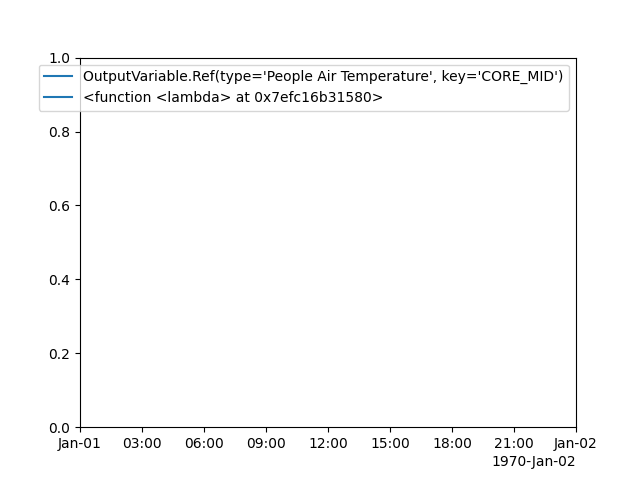

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (501,) and arg 1 with shape (500,).

In [14]:
%matplotlib widget

from energyplus.ooep.addons.plotting import VariableTrendChart2DProvider

_ = simulator.add(
    trend_chart := (
        VariableTrendChart2DProvider(
            event_ref='begin_zone_timestep_before_init_heat_balance'
        )
            .add(
                _ooep_.OutputVariable.Ref(
                    type='People Air Temperature',
                    key='CORE_MID',
                )
            )
            .add(lambda: 1)
            .legend()
    ),
)

## 🤔 Reflect

### 🎩 Tricks

In [ ]:
list(simulator.variables.keys().group(type).keys())

# TODO mv
import pandas as _pandas_
import itables as _itables_
_itables_.init_notebook_mode(all_interactive=True)

_pandas_.DataFrame(simulator.variables.keys().group(type)[_ooep_.Actuator.Ref])
list(simulator.variables.keys().group(type)[_ooep_.OutputVariable.Ref])
_pandas_.DataFrame(simulator.variables.keys().group(type)[_ooep_.OutputVariable.Ref])
list(
    simulator.variables.keys().group(type)[_ooep_.Actuator.Ref].group(lambda x: x.type).keys()
)